In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from pydataset import data

import acquire
import env




# Project Objectives
Document code, process (data acquistion, preparation, exploratory data analysis and statistical testing, modeling, and model evaluation), findings, and key takeaways in a Jupyter Notebook Final Report


- create modules (Acquire.py and Prepare.py)
- Your notebook should begin with a project overview and goals and end with a conclusion that talks about your original goals and how you reached those (or didn't), the key findings, recommendations and next steps ("If I had more time, I would...")


### Include at least 4 visualizations in the form of:

- Question in markdown that you want to answer

- visualization

- statistical test (in at least 2 of your 4)

- Provide your clear answer or takeaway in markdown and natural language to the question based on your exploration

### Business Goals 
- Find drivers for customer churn at Telco. Why are customers churning?

- Construct a ML classification model that accurately predicts customer churn.

- Deliver a report that a non-data scientist can read through and understand what steps were taken, why and what was the outcome?

## 1. Create charts that will help you ubderstand the data

## 2. Construct a model to predict customer churn using classification techniques, and make predictions for a group of customers.

- Include your 3 best models in the final notebook to review. Show the steps and code you went through to fit the models, evaluate, and select.

- On your best model, a chart visualizing how it performed on test would be valuable.

### A Predictions (.csv).

- 3 columns: customer_id, probability of churn, and prediction of churn. (1=churn, 0=not_churn).

- These predictions should be from your best performing model ran on X_test.

- Note that the order of the y_pred and y_proba are numpy arrays coming from running the model on X_test. The order of those values will match the order of the rows in X_test, so you can obtain the customer_id from X_test and concatenate these values together into a dataframe to write to CSV.

## 3. 5 Minute presentation to a group of collegues and managers about the work you did, why, goals, what you found, your methdologies, and your conclusions.

In [2]:
telco_df = acquire.get_telco_data()
train, validate, test = acquire.prep_telco_data(telco_df)
train

,senior_citizen,tenure,monthly_charges,total_charges,gender_Male,partner_Yes,dependents_Yes,multiple_lines_Yes,online_security_Yes,online_backup_Yes,...,streaming_tv_Yes,streaming_movies_Yes,paperless_billing_Yes,contract_type_One_year,contract_type_Two_year,internet_service_type_Fiber_optic,internet_service_type_None,payment_type_Credit_card_(automatic),payment_type_Electronic_check,payment_type_Mailed_check
5919,0,58,71.10,4299.200195,0,0,0,1,1,1,...,0,0,1,1,0,0,0,1,0,0
1915,0,71,85.45,6028.950195,1,0,1,1,1,1,...,0,0,1,1,0,1,0,1,0,0
5054,0,35,25.75,882.549988,0,1,1,1,0,0,...,0,0,1,0,0,0,1,0,1,0
2355,0,1,19.20,19.200001,1,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
6279,1,20,54.00,1055.900024,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,0,24,88.95,2072.750000,0,0,0,1,0,0,...,1,0,1,0,0,1,0,1,0,0
3763,0,10,100.25,1064.650024,0,1,1,1,1,0,...,1,1,1,0,0,1,0,0,1,0
3444,0,22,25.25,555.400024,0,1,1,1,0,0,...,0,0,0,0,1,0,1,1,0,0
1002,0,22,89.10,1949.400024,1,0,1,1,0,1,...,1,0,1,0,0,1,0,1,0,0


### explore the raw data for any nulls, strings that would otherwise be numbers

In [3]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

I go ahead and drop the empty total charges rows

In [111]:
telco_df = telco_df[telco_df.total_charges!=" "]
telco_df

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.60,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.90,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.90,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.00,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.90,267.4,Yes,Month-to-month,Fiber optic,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2,1,2,9987-LUTYD,Female,0,No,No,13,Yes,...,Yes,No,No,No,55.15,742.9,No,One year,DSL,Mailed check
7039,1,2,1,9992-RRAMN,Male,0,Yes,No,22,Yes,...,No,No,Yes,Yes,85.10,1873.7,Yes,Month-to-month,Fiber optic,Electronic check
7040,2,1,1,9992-UJOEL,Male,0,No,No,2,Yes,...,No,No,No,Yes,50.30,92.75,No,Month-to-month,DSL,Mailed check
7041,2,1,3,9993-LHIEB,Male,0,Yes,Yes,67,Yes,...,Yes,No,Yes,No,67.85,4627.65,No,Two year,DSL,Mailed check


In [112]:
telco_df.total_charges = pd.to_numeric(telco_df.total_charges)

convert the strings to a float

In [113]:

telco_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7032 non-null   int64  
 1   internet_service_type_id  7032 non-null   int64  
 2   contract_type_id          7032 non-null   int64  
 3   customer_id               7032 non-null   object 
 4   gender                    7032 non-null   object 
 5   senior_citizen            7032 non-null   int64  
 6   partner                   7032 non-null   object 
 7   dependents                7032 non-null   object 
 8   tenure                    7032 non-null   int64  
 9   phone_service             7032 non-null   object 
 10  multiple_lines            7032 non-null   object 
 11  online_security           7032 non-null   object 
 12  online_backup             7032 non-null   object 
 13  device_protection         7032 non-null   object 
 14  tech_sup

- below we get a more detailed look into the rows with nulls.
- we discovery is that these are customers who have been with the company for less than 1 month, 
- therefore since the data is relatively small,(less than 1%) we decide to drop the rows that contain the nulls

removing redundant columns

In [ ]:
columns_dropped = ["customer_id"]
telco_df = telco_df.drop(columns = columns_dropped)

visializing churners datathe current data that we have 

In [7]:
100*telco_df["churn"].value_counts()/len(telco_df["churn"])

No     73.421502
Yes    26.578498
Name: churn, dtype: float64

we realize that we have an issue of imbalanced data with a ratio of =  0.73: 0.27

will proceed to upsample in the train data set


In [8]:
telco_df["churn"].value_counts()

No     5163
Yes    1869
Name: churn, dtype: int64

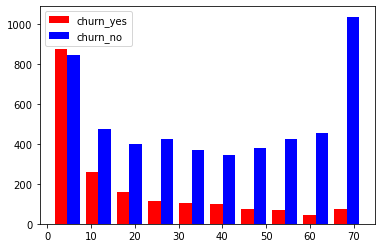

In [9]:
tenure_not_churn = telco_df[telco_df.churn == "No"].tenure
tenure_churn = telco_df[telco_df.churn == "Yes"].tenure


# plt.ylabel("$customers$")
# plt.xlabel ("$telco_df.tenure$")
# plt.title ("Tenure and Churned Customers")
plt.hist([tenure_churn, tenure_not_churn], 
          color = ["red", "blue"], 
          label = ["churn_yes", "churn_no"]) 
plt.legend()


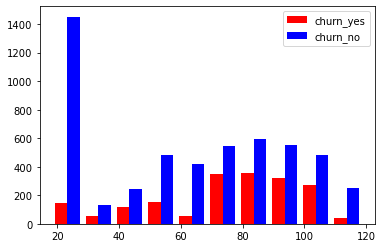

In [10]:
mc_not_churn = telco_df[telco_df.churn == "No"].monthly_charges
mc_churn = telco_df[telco_df.churn == "Yes"].monthly_charges


# plt.ylabel("$customers$")
# plt.xlabel ("$telco_df.tenure$")
# plt.title ("Tenure and Churned Customers")
plt.hist([mc_churn, mc_not_churn], 
          color = ["red", "blue"], 
          label = ["churn_yes", "churn_no"]) 
plt.legend()


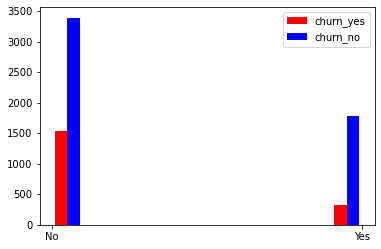

In [11]:
d_not_churn = telco_df[telco_df.churn == "No"].dependents
d_churn = telco_df[telco_df.churn == "Yes"].dependents


# plt.ylabel("$customers$")
# plt.xlabel ("$telco_df.tenure$")
# plt.title ("Tenure and Churned Customers")
plt.hist([d_churn, d_not_churn], 
          color = ["red", "blue"], 
          label = ["churn_yes", "churn_no"]) 
plt.legend()


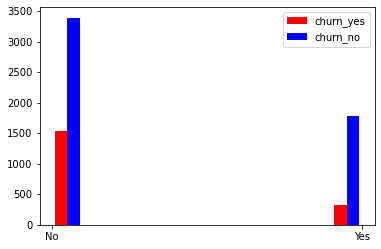

In [12]:
pt_not_churn = telco_df[telco_df.churn == "No"].payment_type
pt_churn = telco_df[telco_df.churn == "Yes"].payment_type


# plt.ylabel("$customers$")
# plt.xlabel ("$telco_df.tenure$")
# plt.title ("Tenure and Churned Customers")
plt.hist([d_churn, d_not_churn], 
          color = ["red", "blue"], 
          label = ["churn_yes", "churn_no"]) 
plt.legend()

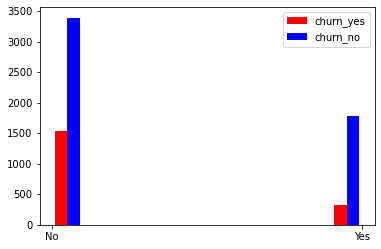

In [13]:
pt_not_churn = telco_df[telco_df.churn == "No"].senior_citizen
pt_churn = telco_df[telco_df.churn == "Yes"].senior_citizen


# plt.ylabel("$customers$")
# plt.xlabel ("$telco_df.tenure$")
# plt.title ("Tenure and Churned Customers")
plt.hist([d_churn, d_not_churn], 
          color = ["red", "blue"], 
          label = ["churn_yes", "churn_no"]) 
plt.legend()

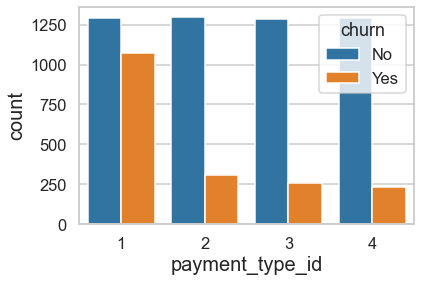

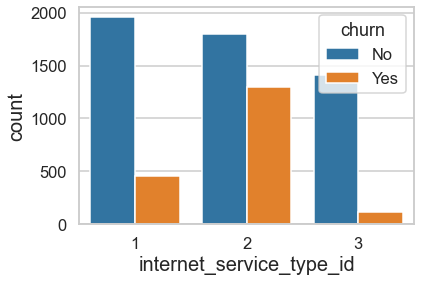

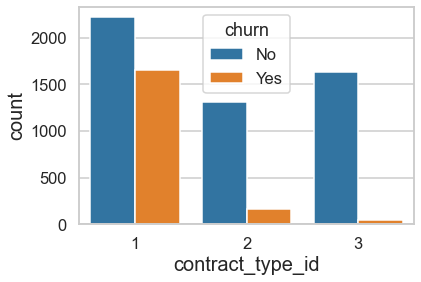

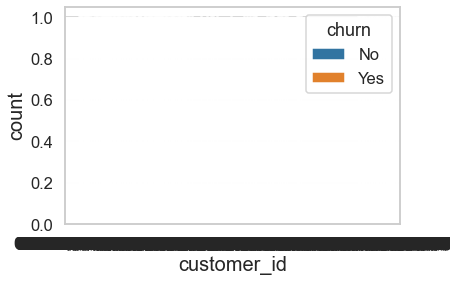

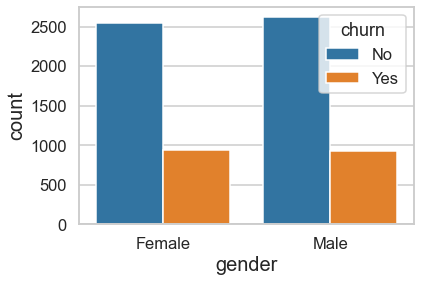

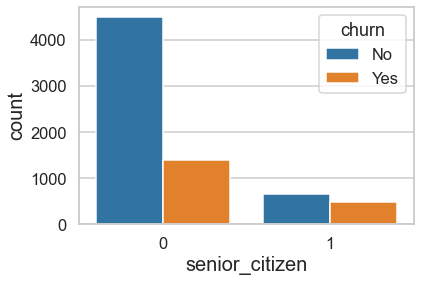

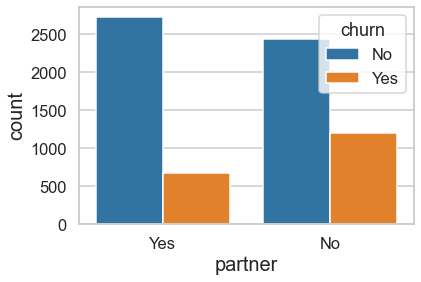

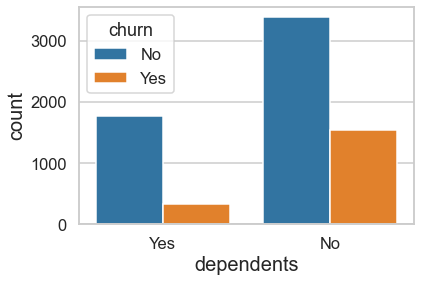

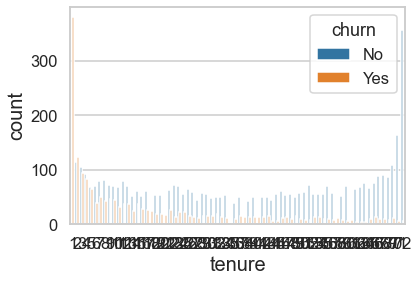

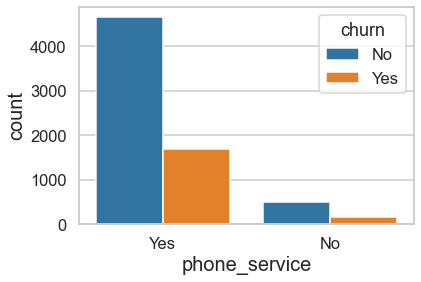

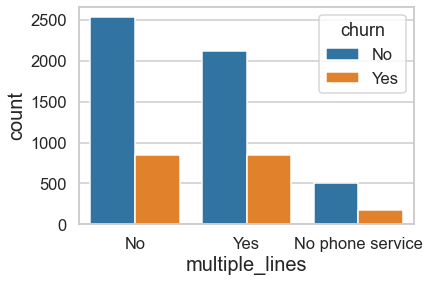

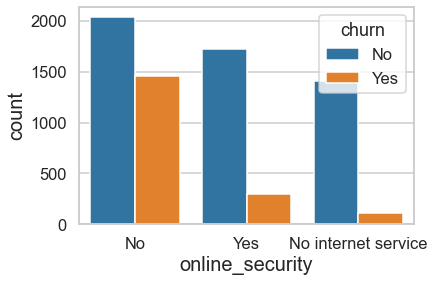

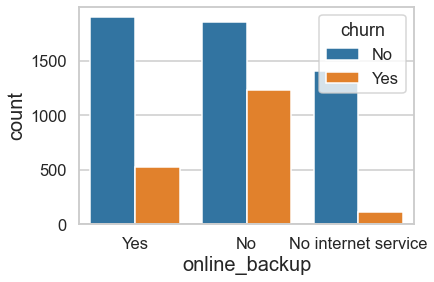

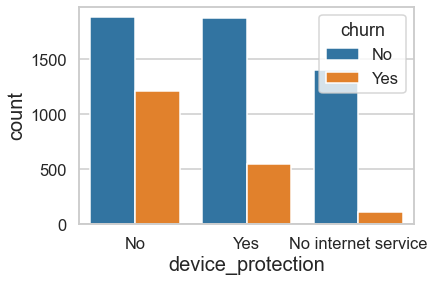

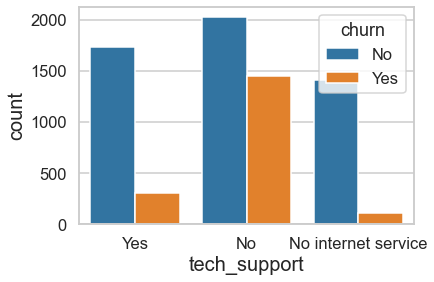

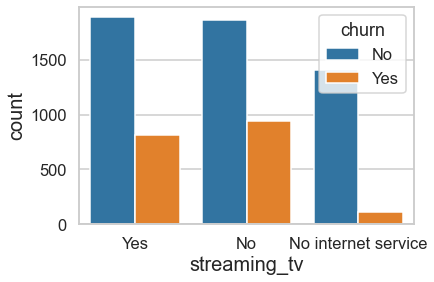

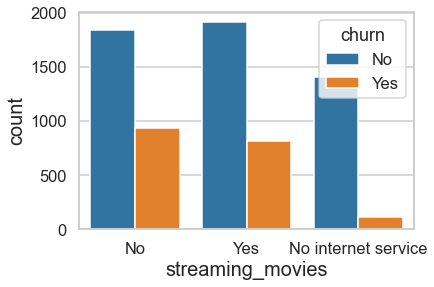

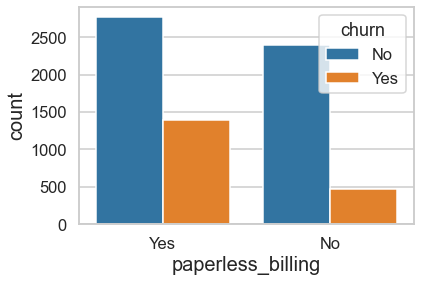

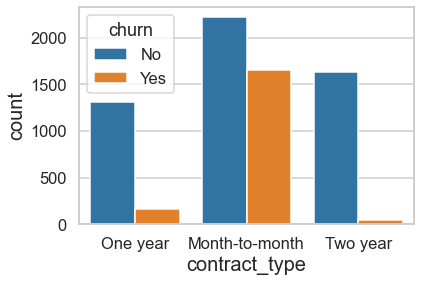

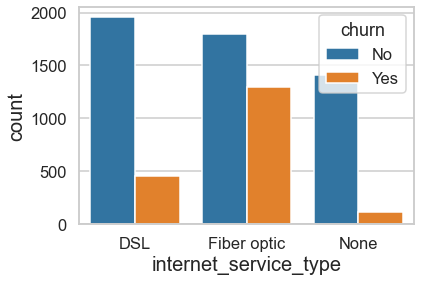

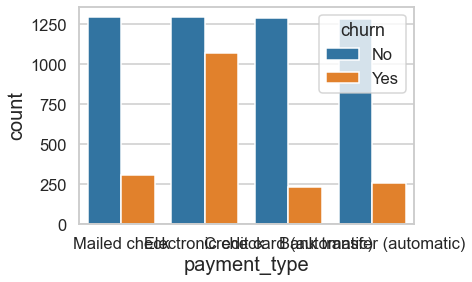

In [107]:
for i, predictor in enumerate(telco_df.drop(columns=['churn', 'total_charges', 'monthly_charges'])):
    plt.figure(i)
    sns.countplot(data=telco_df, x=predictor, hue='churn')

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3937 entries, 5919 to 4192
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   senior_citizen                        3937 non-null   int64  
 1   tenure                                3937 non-null   int64  
 2   monthly_charges                       3937 non-null   float64
 3   total_charges                         3937 non-null   float32
 4   gender_Male                           3937 non-null   uint8  
 5   partner_Yes                           3937 non-null   uint8  
 6   dependents_Yes                        3937 non-null   uint8  
 7   multiple_lines_Yes                    3937 non-null   uint8  
 8   online_security_Yes                   3937 non-null   uint8  
 9   online_backup_Yes                     3937 non-null   uint8  
 10  device_protection_Yes                 3937 non-null   uint8  
 11  tech_support_Y

churn rates by feature

(gender, senior citizens)

write findings/ takeaways

churn vs phone service

chart churn endcoded

statistical test on every feature

summary of pvalues and H0 testing


In [110]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7032 non-null   int64  
 1   internet_service_type_id  7032 non-null   int64  
 2   contract_type_id          7032 non-null   int64  
 3   customer_id               7032 non-null   object 
 4   gender                    7032 non-null   object 
 5   senior_citizen            7032 non-null   int64  
 6   partner                   7032 non-null   object 
 7   dependents                7032 non-null   object 
 8   tenure                    7032 non-null   int64  
 9   phone_service             7032 non-null   object 
 10  multiple_lines            7032 non-null   object 
 11  online_security           7032 non-null   object 
 12  online_backup             7032 non-null   object 
 13  device_protection         7032 non-null   object 
 14  tech_sup

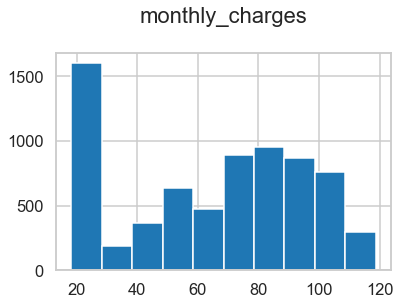

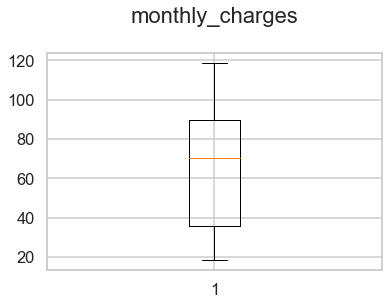

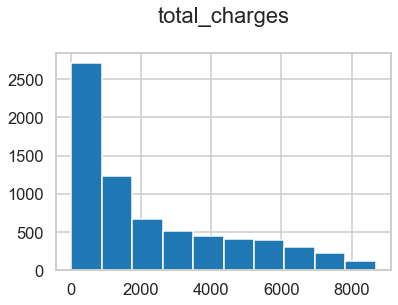

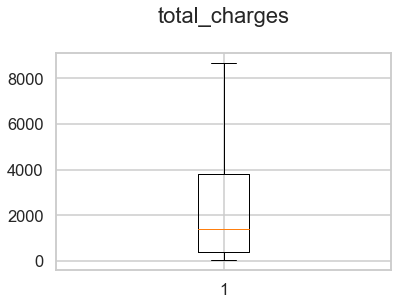

In [114]:
num_cols = telco_df.columns[[telco_df[col].dtype == 'float' for col in telco_df.columns]]
for col in num_cols:
    plt.hist(telco_df[col])
    plt.title(col)
    plt.show()
    plt.boxplot(telco_df[col])
    plt.title(col)
    plt.show()
    
    


<AxesSubplot:xlabel='payment_type', ylabel='monthly_charges'>

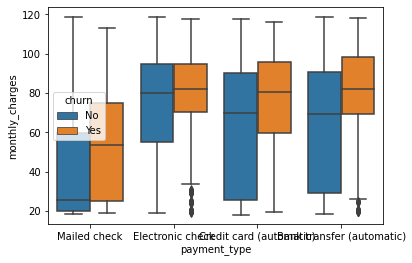

In [18]:
cat_cols = telco_df.columns[[telco_df[col].dtype == 'object' for col in telco_df.columns]]
sns.boxplot(y="monthly_charges", x="payment_type", hue = "churn", data=telco_df)
     

# Train

In [19]:
train, validate, test = acquire.prep_telco_data(telco_df)

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3937 entries, 5919 to 4192
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   senior_citizen                        3937 non-null   int64  
 1   tenure                                3937 non-null   int64  
 2   monthly_charges                       3937 non-null   float64
 3   total_charges                         3937 non-null   float32
 4   gender_Male                           3937 non-null   uint8  
 5   partner_Yes                           3937 non-null   uint8  
 6   dependents_Yes                        3937 non-null   uint8  
 7   multiple_lines_Yes                    3937 non-null   uint8  
 8   online_security_Yes                   3937 non-null   uint8  
 9   online_backup_Yes                     3937 non-null   uint8  
 10  device_protection_Yes                 3937 non-null   uint8  
 11  tech_support_Y

In [21]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
senior_citizen,3937.0,0.161290,0.367845,0.00,0.000000,0.000000,0.000000,1.000000
tenure,3937.0,32.775210,24.709604,1.00,9.000000,30.000000,56.000000,72.000000
monthly_charges,3937.0,64.805131,30.294804,18.25,34.700000,70.250000,90.300000,118.650000
total_charges,3937.0,2316.774902,2284.984131,18.85,396.100006,1414.800049,3893.600098,8594.400391
gender_Male,3937.0,0.501905,0.500060,0.00,0.000000,1.000000,1.000000,1.000000
partner_Yes,3937.0,0.485141,0.499843,0.00,0.000000,0.000000,1.000000,1.000000
dependents_Yes,3937.0,0.302769,0.459514,0.00,0.000000,0.000000,1.000000,1.000000
multiple_lines_Yes,3937.0,0.423927,0.494242,0.00,0.000000,0.000000,1.000000,1.000000
online_security_Yes,3937.0,0.292609,0.455018,0.00,0.000000,0.000000,1.000000,1.000000
online_backup_Yes,3937.0,0.348743,0.476633,0.00,0.000000,0.000000,1.000000,1.000000


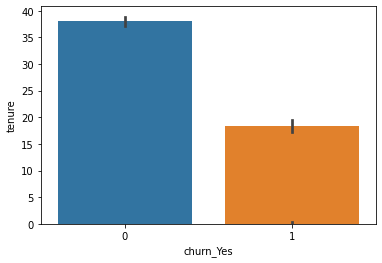

In [22]:
num_cols = train.columns[[train[col].dtype == 'int' for col in train.columns]]
for col in num_cols:
     sns.barplot(y= col, x= "churn_Yes", data =train)

### Univariate Analysis

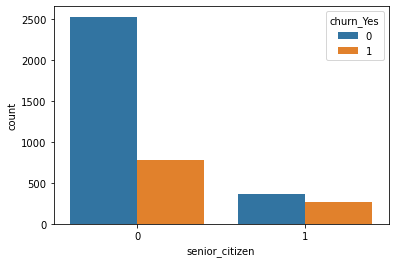

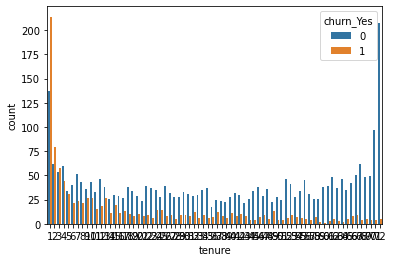

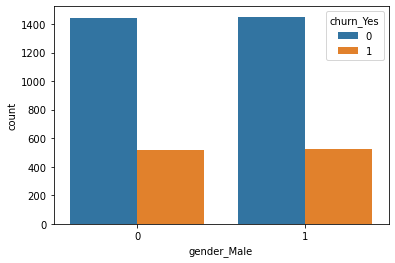

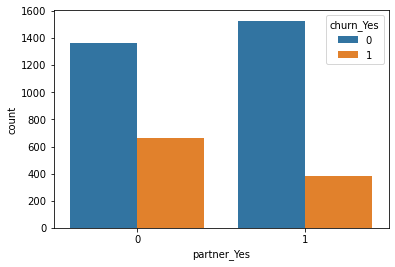

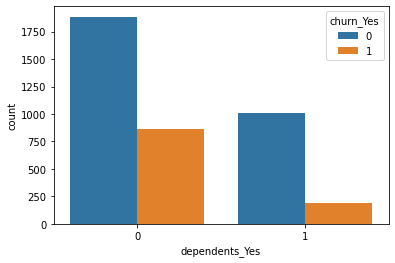

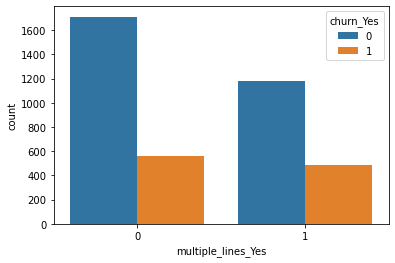

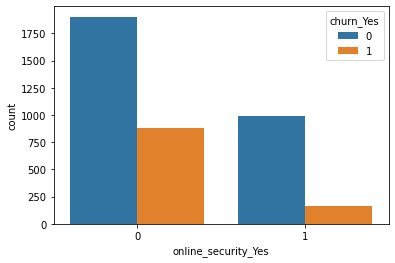

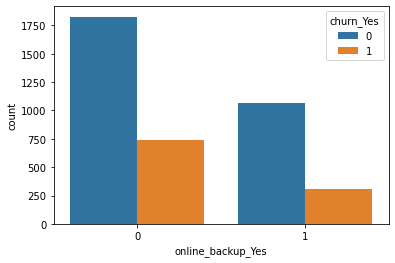

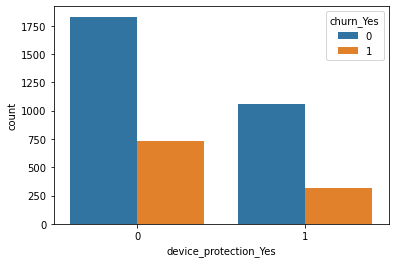

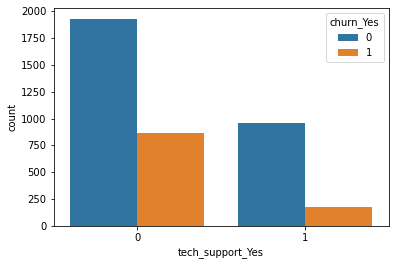

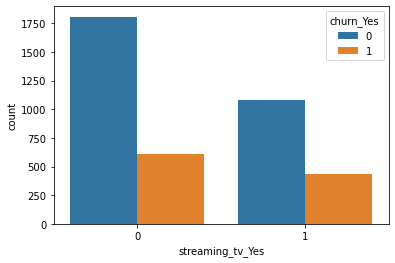

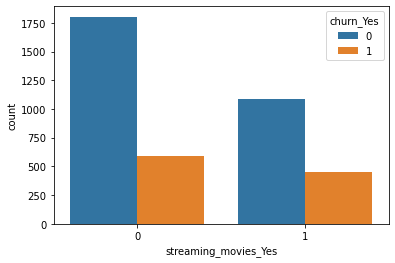

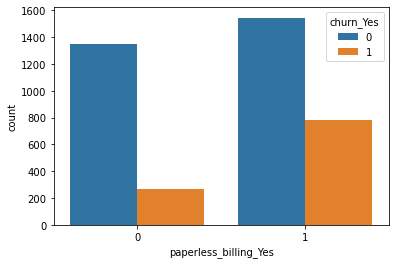

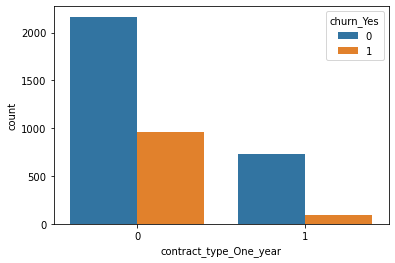

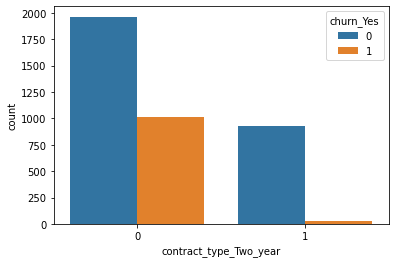

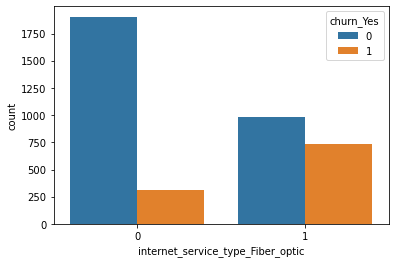

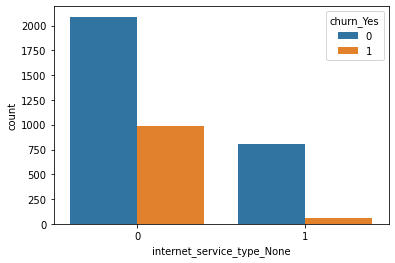

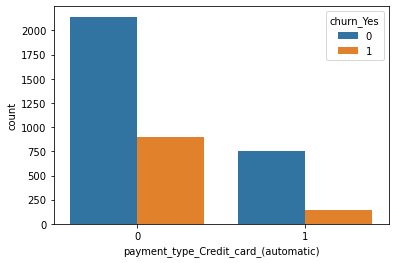

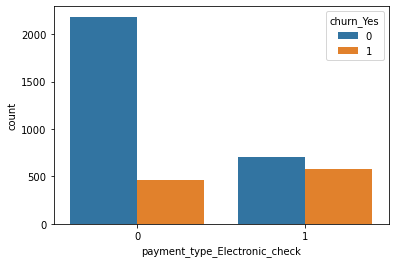

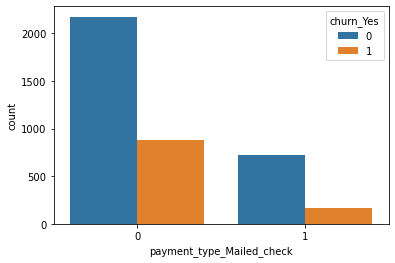

In [25]:
for i, predictor in enumerate(train.drop(columns = ["churn_Yes","total_charges","monthly_charges"])):
    plt.figure(i)
    sns.countplot(data = train, x = predictor, hue = "churn_Yes")

#     for i, predictor in enumerate(telco_data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
#     plt.figure(i)
#     sns.countplot(data=telco_data, x=predictor, hue='Churn')

Text(0.5, 1.0, 'Monthly charges by churn')

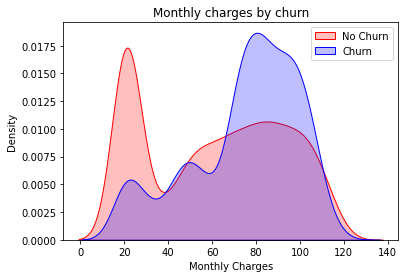

In [26]:
m_ch = sns.kdeplot(train.monthly_charges[(train["churn_Yes"] == 0) ],
                color="Red", shade = True)
m_ch = sns.kdeplot(train.monthly_charges[(train["churn_Yes"] == 1) ],
                ax = m_ch, color="Blue", shade= True)
m_ch.legend(["No Churn","Churn"],loc='upper right')
m_ch.set_ylabel('Density')
m_ch.set_xlabel('Monthly Charges')
m_ch.set_title('Monthly charges by churn')

Churn is high when monthly charges are high

correlation predictor

<AxesSubplot:>

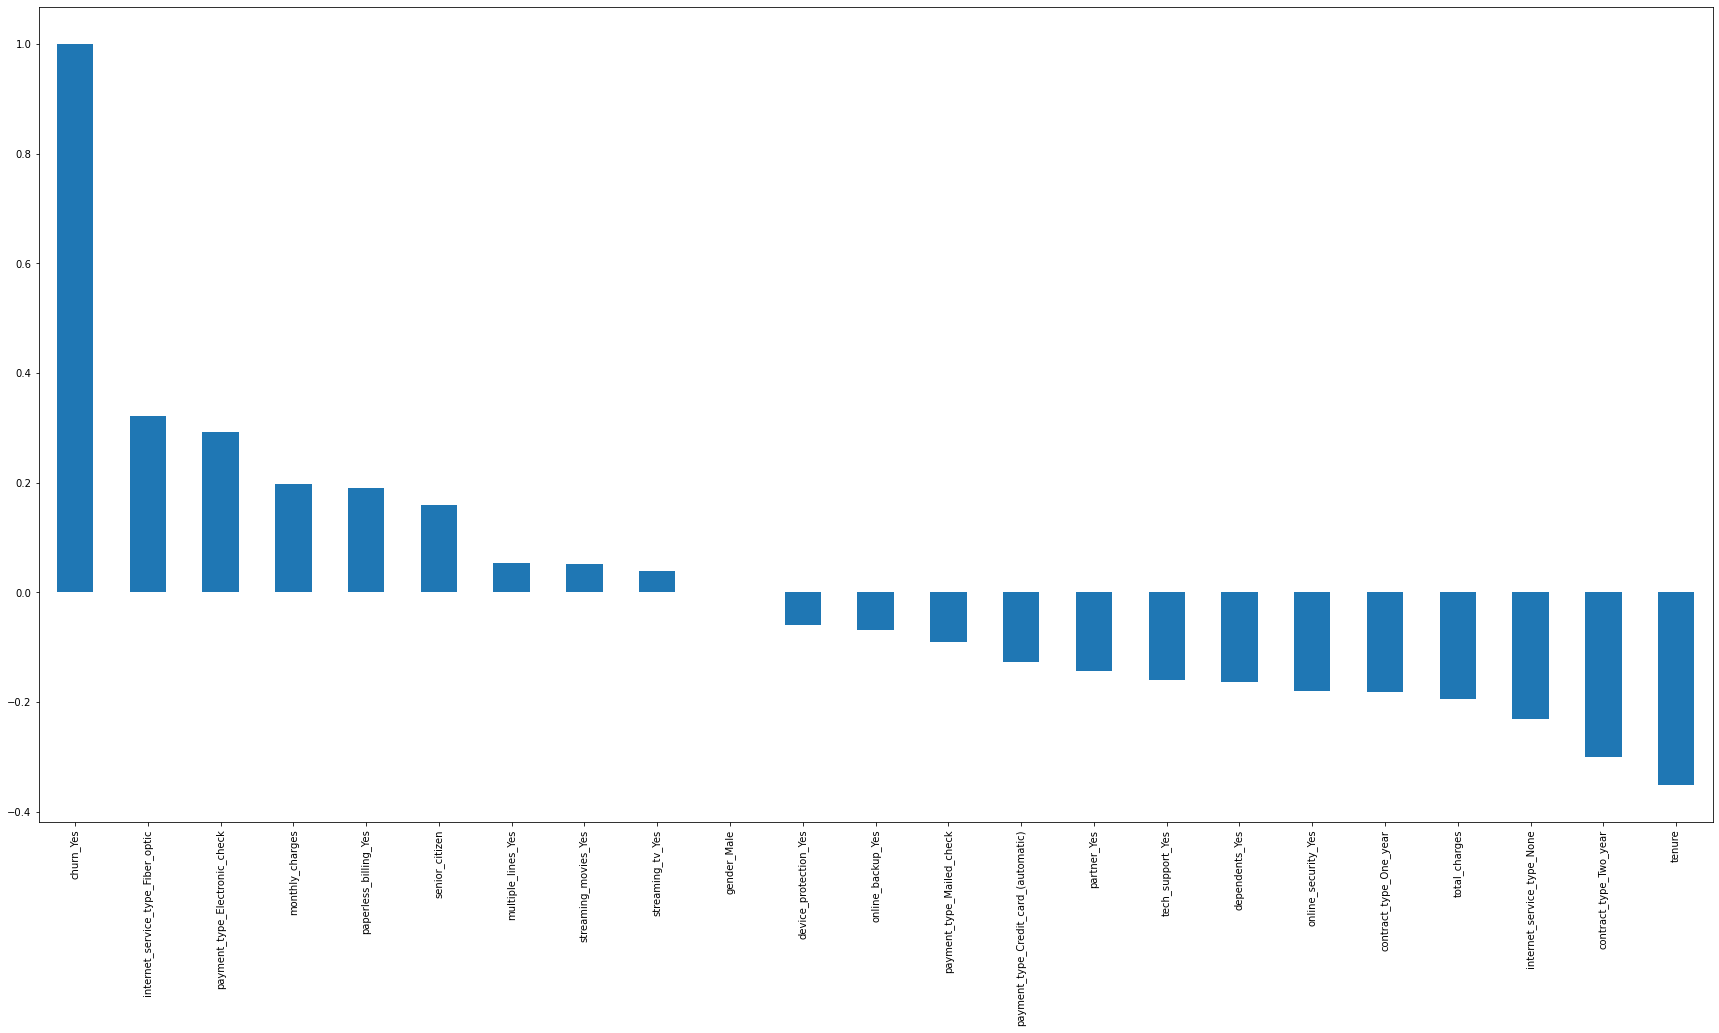

In [31]:
plt.figure(figsize=(30,15))
train.corr()['churn_Yes'].sort_values(ascending = False).plot(kind='bar')

internet type fiber optivs, electronic payment type and monthly charges correlate highly to the churn rate

### Bivariate Analysis

In [78]:
target_0=train.loc[train["churn_Yes"]==0]
target_1=train.loc[train["churn_Yes"]==1]

In [80]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=train[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

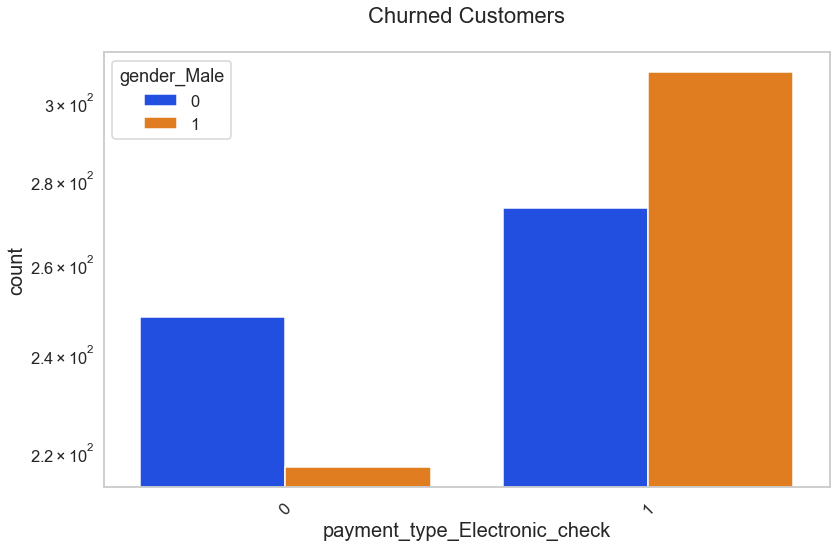

In [84]:
uniplot(target_1,col='payment_type_Electronic_check',title='Churned Customers',hue='gender_Male')


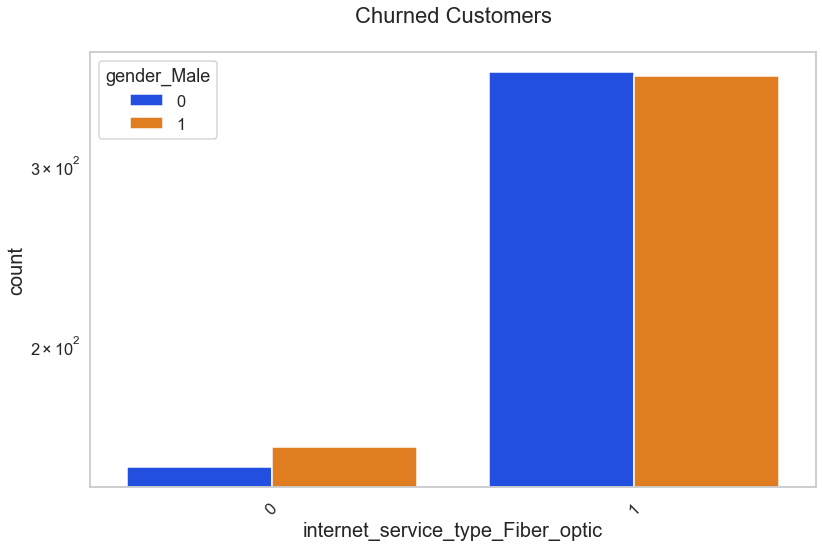

In [86]:
uniplot(target_1,col='internet_service_type_Fiber_optic',title= 'Churned Customers',hue="gender_Male")


In [ ]:
pt_not_churn = train[train.churn_Yes == 0].payment_type_Electronic_check         
pt_churn = train[train.churn_Yes == 1].payment_type_Electronic_check         


# plt.ylabel("$customers$")
# plt.xlabel ("$telco_df.tenure$")
# plt.title ("Tenure and Churned Customers")
plt.hist([d_churn, d_not_churn], 
          color = ["red", "blue"], 
          label = ["churn_yes", "churn_no"]) 
plt.legend()

In [66]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7032 non-null   int64  
 1   internet_service_type_id  7032 non-null   int64  
 2   contract_type_id          7032 non-null   int64  
 3   customer_id               7032 non-null   object 
 4   gender                    7032 non-null   object 
 5   senior_citizen            7032 non-null   int64  
 6   partner                   7032 non-null   object 
 7   dependents                7032 non-null   object 
 8   tenure                    7032 non-null   int64  
 9   phone_service             7032 non-null   object 
 10  multiple_lines            7032 non-null   object 
 11  online_security           7032 non-null   object 
 12  online_backup             7032 non-null   object 
 13  device_protection         7032 non-null   object 
 14  tech_sup

We explore to find drivers of the target

If a variable ain’t predictive, then don’t build a predictive model with it.

Train our model on the training dataset (and only train)

Evaluate the model on train

If model’s performance is worse than baseline, toss it.

If the model’s performance on train is better than baseline, move forward.

We’ll evaluate that model on validate, to check if it’s overfit or not.
- If overfit, try other hyperparameters or another model type

Essentially, we’ll treat validate as a “test” we can use multiple times.

We’ll tune our hyperparameters on train and hopefully they improve performance on validate

In a way, we’re using validate in place of test and we’re evaluating many models with validate as our “out of sample”

Identify your top model - the best performing model on validate.

Finally, once, evaluate that best model’s performance on test.
Then you’re done w/ the modeling.

In [ ]:
train.columns = train.columns.str.replace(' ', '_')
train.info()



we realize that we have an issue of imbalanced data with a ratio of = 0.73: 0.27

will proceed to upsample in the train data set

In [ ]:
train["churn_Yes"].value_counts()

evaluation of the current train data set

In [ ]:
churners = train[train["churn_Yes"] == 1]
non_churners  = train[train["churn_Yes"] == 0]

from sklearn.utils import resample
churners_upsample = resample(churners,
             replace=True,
             n_samples=len(non_churners),
             random_state=42)



In [ ]:
new_train = pd.concat([churners_upsample, non_churners])

new_train

In [ ]:
new_train["churn_Yes"].value_counts()

In [87]:
from sklearn.model_selection import train_test_split

def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in the telco df, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [88]:
train, validate, test = train_validate_test_split(train, target = "churn_Yes", seed =123)

X_train = train.drop(columns = ["churn_Yes"])
y_train = train.churn_Yes

X_validate = validate.drop(columns = ["churn_Yes"])
y_validate = validate.churn_Yes

X_test = test.drop(columns = ["churn_Yes"])
y_test = test.churn_Yes

In [89]:
rf = RandomForestClassifier(max_depth=5, 
                            random_state=123)

In [90]:
rf = rf.fit(X_train, y_train)


In [91]:
print(rf.feature_importances_)

[0.01568469 0.19549115 0.10100166 0.15323788 0.00483675 0.00682344
 0.00837724 0.00626257 0.04292528 0.00868162 0.00424327 0.03022029
 0.00426796 0.00558952 0.02118279 0.05259975 0.07551062 0.14690008
 0.05127899 0.00462323 0.05183899 0.00842222]


In [92]:
y_pred = rf.predict(X_train)
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=uint8)

In [93]:
y_pred_proba = rf.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.97074225, 0.02925775],
       [0.38152763, 0.61847237],
       [0.77382148, 0.22617852],
       [0.32960794, 0.67039206],
       [0.80497124, 0.19502876]])

In [94]:
y_pred_proba = rf.predict_proba(X_train)
y_pred_proba

array([[0.97074225, 0.02925775],
       [0.38152763, 0.61847237],
       [0.77382148, 0.22617852],
       ...,
       [0.94795694, 0.05204306],
       [0.9524698 , 0.0475302 ],
       [0.78839179, 0.21160821]])

In [95]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(rf.score(X_validate, y_validate)))

Accuracy of Decision Tree classifier on validate set: 0.81


In [96]:
y_pred = rf.predict(X_validate)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.93      0.88       694
           1       0.72      0.48      0.58       251

    accuracy                           0.81       945
   macro avg       0.78      0.71      0.73       945
weighted avg       0.80      0.81      0.80       945



as shown above the model F1 score for the churners(yes) is .53

this prompts for an upsample for the training data set

In [ ]:
# ham_messages = spam_dataset[spam_dataset["v1"] == "ham"]
# spam_messages  = spam_dataset[spam_dataset["v1"] == "spam"]
# print(ham_messages.shape)
# print(spam_messages.shape)

In [ ]:

# from sklearn.utils import resample
# churners_upsample = resample(churners,
#              replace=True,
#              n_samples=len(non_churners),
#              random_state=42)

# print(churners_upsample.shape)



## New Train Model 

In [102]:
import statistics
# The mode is a great baseline
baseline = y_train.mode()


# Produce a boolean array with True representing a match between the baseline prediction and reality
matches_baseline_prediction = (y_train == 0)

baseline_accuracy = matches_baseline_prediction.mean()
print(f"Baseline accuracy: {round(baseline_accuracy, 2)}")
baseline

Baseline accuracy: 0.73


0    0
dtype: uint8

In [97]:
from sklearn.model_selection import train_test_split

def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in the telco df, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [98]:
new_train, validate, test = train_validate_test_split(new_train, target = "churn_Yes", seed =123)

X_train = new_train.drop(columns = ["churn_Yes"])
y_train = new_train.churn_Yes

X_validate = validate.drop(columns = ["churn_Yes"])
y_validate = validate.churn_Yes

X_test = test.drop(columns = ["churn_Yes"])
y_test = test.churn_Yes


NameError: name 'new_train' is not defined

In [ ]:
rf_new = RandomForestClassifier(max_depth=5, 
                            random_state=123)

In [ ]:
rf_new = rf_new.fit(X_train, y_train)

In [ ]:
print(rf_new.feature_importances_)


In [ ]:
y_pred = rf_new.predict(X_train)
y_pred

In [ ]:
y_pred_proba = rf_new.predict_proba(X_train)
y_pred_proba[0:5]

In [ ]:
y_pred_proba = rf_new.predict_proba(X_train)
y_pred_proba

In [ ]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(rf_new.score(X_validate, y_validate)))

In [ ]:
y_pred = rf_new.predict(X_validate)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_pred))

### Baseline

In [ ]:
train.churn_Yes.value_counts()


In [ ]:
# The mode is a great baseline
baseline = y_train.mode()

# Produce a boolean array with True representing a match between the baseline prediction and reality
matches_baseline_prediction = (y_train == 0)

baseline_accuracy = matches_baseline_prediction.mean()
print(f"Baseline accuracy: {round(baseline_accuracy, 2)}")

## for optimal model 

In [ ]:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []

for i in range(2, 25):
    # Make the model
    forest = RandomForestClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df


In [ ]:
df.set_index('max_depth').plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid()

## Increasing minimum samples per leaf, decreasing max depth


In [ ]:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []
max_depth = 20

for i in range(2, max_depth):
    # Make the model
    depth = max_depth - i
    n_samples = i
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

In [ ]:
df.set_index('max_depth')[['train_accuracy', 'validate_accuracy','difference']].plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid()

## Increase both minimum samples per leaf and max depth


In [103]:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []
max_depth = 20

for i in range(2, max_depth):
    # Make the model
    depth = i
    n_samples = i
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,2,2,0.748639,0.752381,-0.003742
1,3,3,0.780853,0.794709,-0.013856
2,4,4,0.798548,0.806349,-0.007801
3,5,5,0.807623,0.813757,-0.006134
4,6,6,0.823049,0.814815,0.008234
5,7,7,0.821688,0.809524,0.012164
6,8,8,0.831670,0.810582,0.021088
7,9,9,0.829855,0.811640,0.018215
8,10,10,0.834846,0.809524,0.025322
9,11,11,0.829401,0.808466,0.020935


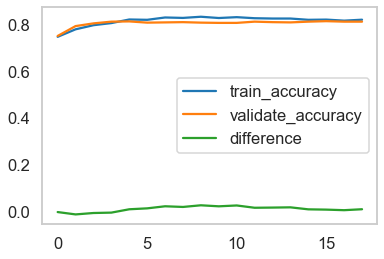

In [104]:
df[['train_accuracy', 'validate_accuracy','difference']].plot()
plt.grid()

## Fixed depth and increasing min samples leaf


In [105]:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []


for i in range(2, 50):
    # Make the model
    depth = 5
    n_samples = i
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,2,5,0.811706,0.813757,-0.002051
1,3,5,0.812613,0.812698,-0.000085
2,4,5,0.810799,0.812698,-0.001900
3,5,5,0.807623,0.813757,-0.006134
4,6,5,0.808076,0.813757,-0.005680
5,7,5,0.807623,0.813757,-0.006134
6,8,5,0.808530,0.815873,-0.007343
7,9,5,0.808984,0.816931,-0.007948
8,10,5,0.810345,0.815873,-0.005528
9,11,5,0.806715,0.814815,-0.008100


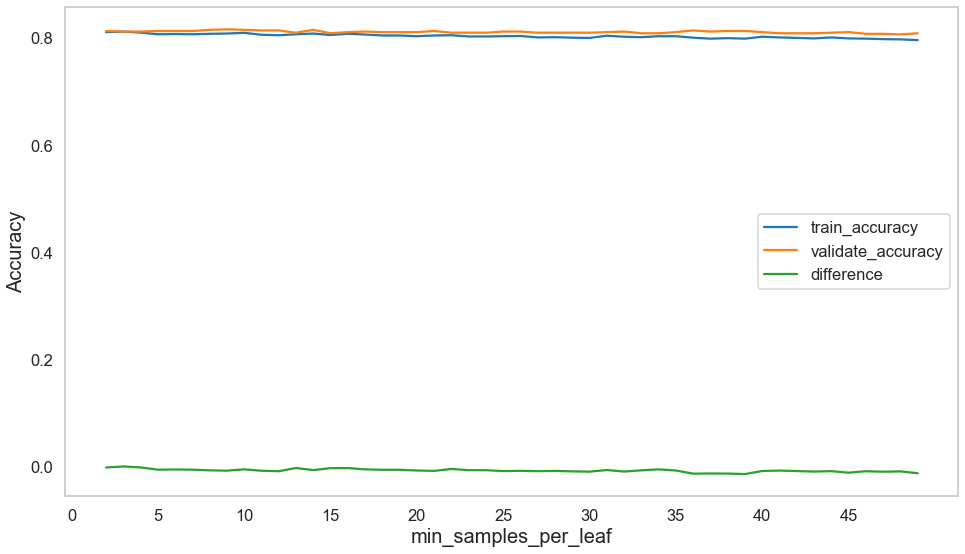

In [106]:
df.set_index('min_samples_per_leaf')[['train_accuracy', 'validate_accuracy', 'difference']].plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,50,5))
plt.grid()